# Data Wrangling Project Part2: Mini Report

> In this report, several insights based on the cleaned data from Part1 are provided. The research questions are as follows: 
1. The popularity of each dog "stage" (i.e. doggo, floofer, pupper, and puppo)
2. The method of accessing to twitter
3. The number of counts for retweet and favorite to get insight into popularity of tweets
4. Relationship between retweet_count and favorite_count
5. The proportion of image predictions that predict dog images as the first stage

In [1]:
# Import the relevant libraries 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the cleaned data 
archive_master = pd.read_csv('twitter_archive_master.csv')
predictions_master = pd.read_csv('predictions_master.csv')

In [3]:
archive_master.head(3)       

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,7561.0,35745.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,5601.0,30882.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,3712.0,23230.0


In [4]:
predictions_master.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Insights 

#### 1. The Popularity of Dog Stage

Text(0.5, 1.0, 'The Number of Dogs at Each Stage')

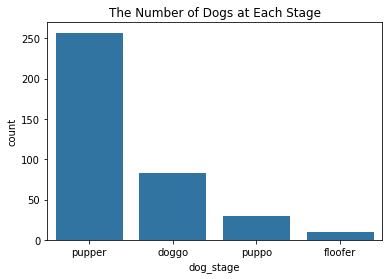

In [5]:
base_color = sns.color_palette()[0]
stage_order = archive_master.dog_stage.value_counts().index
sns.countplot(data =archive_master, x = 'dog_stage' , color = base_color, order = stage_order)
plt.title('The Number of Dogs at Each Stage')

Text(0.5, 1.0, 'The Number of Counts at Each Stage')

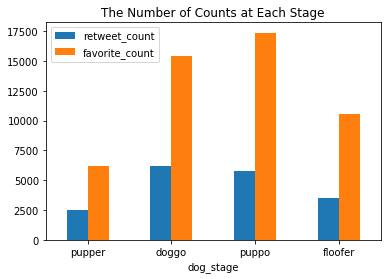

In [6]:
stage_order=['pupper','doggo','puppo','floofer']
retweet_counts_avg=archive_master.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean()
ax = retweet_counts_avg.loc[stage_order].plot(kind="bar")
plt.xticks(rotation =360)
plt.title('The Number of Counts at Each Stage')

> The first bar chart of dog stage shows that the twitter texts that puppers are mentioned is highly dominated in the Twitter account of #WeRateDogs. The second mostly mentioned dog is "doggo". However, the number of doggos mentioned in the texts is still below the half of puppers. People are more likely to click the favorites than retweet. Regardless of dog categories, the number of favourite counts is always larger than that of retweet counts. According to the number of counts, "doggo" and "puppo" are the most popular types of dog in comparsion with "pupper" and "floofer".

#### 2. The Method of Accessing to Twitter

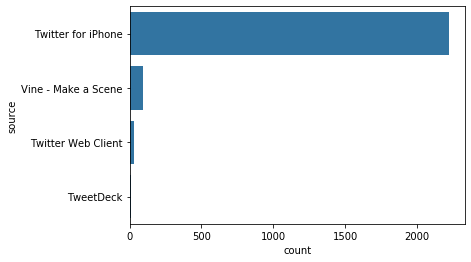

In [7]:
# Create the bar plot
base_color = sns.color_palette()[0]
source_order = archive_master.source.value_counts().index
sns.countplot(data =archive_master, y = 'source' , color = base_color, order = source_order)

In [8]:
archive_master.groupby('source')['tweet_id'].count()/archive_master['tweet_id'].count()

source
TweetDeck              0.004669
Twitter Web Client     0.014007
Twitter for iPhone     0.942699
Vine - Make a Scene    0.038625
Name: tweet_id, dtype: float64

> According to the bar plot, more than 90% of users access to the twitter account through iPhone. Other options are barely used. 

#### 3. The Number of Retweet- and Favorite-counts

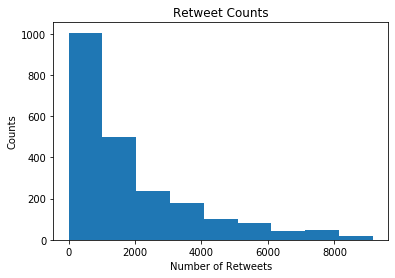

In [9]:
limit = np.nanpercentile(archive_master['retweet_count'], 95)
parameter = archive_master['retweet_count'] < limit
data = archive_master['retweet_count'][parameter]
plt.hist(data, bins = 9, range = [0, limit])
plt.title("Retweet Counts")
plt.xlabel("Number of Retweets")
plt.ylabel("Counts")
plt.show()

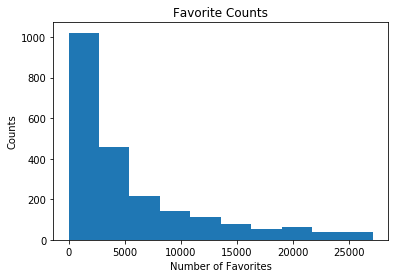

In [10]:
limit = np.nanpercentile(archive_master['favorite_count'], 95)
parameter = archive_master['favorite_count'] < limit
data = archive_master['favorite_count'][parameter]
plt.hist(data, range = [0, limit])
plt.title("Favorite Counts")
plt.xlabel("Number of Favorites")
plt.ylabel("Counts")
plt.show()

> Then I plot the distirbution of retweets- and favorite counts to get an insight about popularity of tweets. Both show similar distributions: highly skewed to the right. This indicates that there are much more tweet_ids which received small number of retweets and favorites than tweet_ids with large number of countings. As the number of retweet- and favorite counts is increasing, the number postings with great many counts are exponentially decreasing.

#### 4. Relationship between Retweets and Favorites

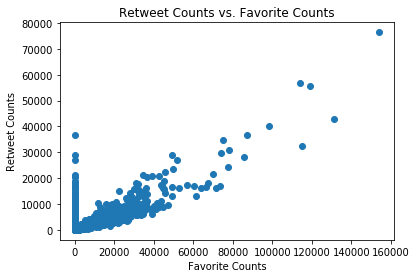

In [11]:
retweet = archive_master.retweet_count
favorite = archive_master.favorite_count
plt.scatter(favorite, retweet)
plt.title("Retweet Counts vs. Favorite Counts")
plt.ylabel("Retweet Counts")
plt.xlabel("Favorite Counts")
plt.show()

In [12]:
correlation = retweet.corr(favorite)
print('Pearsons correlation: %.3f' % correlation)

Pearsons correlation: 0.802


> The number of retweet counts are strongly and positively correlated with the number of favorite counts. Its correlation coefficient is 0.802. This indicates, in general, the more favorites a tweet posting earns, the more retweets the posting is likely to get. 

#### 5. The Proportion of Image Predictions at the First Stage

In [13]:
n_points = predictions_master.shape[0]
predictions_master.groupby('p1_dog')['tweet_id'].count()/n_points*100

p1_dog
False    26.168675
True     73.831325
Name: tweet_id, dtype: float64

> Finally, I calcuated the [accuracy score](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/) of the algorithm, which used for image predictions. It is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage. The algorithm achieved 73.83% of accuracy score. 

## Summary

>- According to the bar plots, we can imply that 'Pupper' is the most frequently uploaded images in '@WeRateDogs', while 'Floofer' is very rare in this page. Interestingly, 'Pupper' earns the least number of retweet and favorite counts comparing to other categories. On the other hand, ‘Puppo’ and 'Doggo' show high popularity in this twitter community.
>- Many users access to '@WeRateDogs' using twitter app for iPhone. Other people connect to twitter through the application:  Vine – Make A Scene. This is an iPhone app which can create short videos and share them. This video social sharing iOS app is cooperated with Twitter, so that users can sign into the Vine iPhone app with a Twitter authorization. Also, there are a few people who enjoy twitter through twitter's website or TweekDeck(personal browser).
>- Most images earn less than 1000 retweets and there are a few images which obtain more than 8000 number of retweets. Similarly, a lot of images received less than 2,500 favorites, while only a few images could earn more than 25,000 favorites. As shown in the both histograms, the distributions of 'retweet_count' and 'favorite_count' look pretty much similar. The number of images with higher popularity decrease exponentially.
>- The scatter plot indicates a strong positive relationship between retweet counts and favorite counts. The correlation coefficient value is 0.802. 
>- Finally, I analyse the proprotion of images in the WeRateDogs Twitter are predicted as a dog in the first place. It turns out that the algorithm predicted about 73.83% of images as a dog at the first prediction.